In [1]:
# ================================================================
# FOOTBALL RATING PREDICTION
# ================================================================

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib
import warnings

In [2]:
# ================================================================
# LOAD DATASET
# ================================================================

# Load dataset
file_path = "fifa_players.csv"
df = pd.read_csv(file_path)

print("DATASET LOADED")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
print(df.head())

DATASET LOADED
Dataset shape: (17954, 51)
Columns: 51
Memory usage: 13.89 MB

First 5 rows:
           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   lon

In [3]:
# ================================================================
# 1. EXPLORATORY DATA ANALYSIS (EDA)
# ================================================================

print("\n" + "="*60)
print("1. EXPLORATORY DATA ANALYSIS")
print("="*60)

# ================================================================
# 1.1 DESCRIPTIVE STATISTICS
# ================================================================

print("\n1.1 DESCRIPTIVE STATISTICS")
print("-"*40)

# Basic dataset information
print(f"Dataset Info:")
print(f"  Rows: {df.shape[0]:,}")
print(f"  Columns: {df.shape[1]}")
print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Missing values analysis
print("\nMissing Values Analysis:")
missing_info = df.isnull().sum()
missing_pct = (missing_info / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_info,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0].head(10))

# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
desc_stats = df[numeric_cols].describe()
print(desc_stats)


1. EXPLORATORY DATA ANALYSIS

1.1 DESCRIPTIVE STATISTICS
----------------------------------------
Dataset Info:
  Rows: 17,954
  Columns: 51
  Memory usage: 13.89 MB

Missing Values Analysis:
                        Missing_Count  Missing_Percentage
national_team                   17097           95.226690
national_team_position          17097           95.226690
national_rating                 17097           95.226690
national_jersey_number          17097           95.226690
release_clause_euro              1837           10.231703
value_euro                        255            1.420296
wage_euro                         246            1.370168

Descriptive Statistics:
                age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.1313


1.2 EXPLORATORY VISUALIZATIONS
----------------------------------------


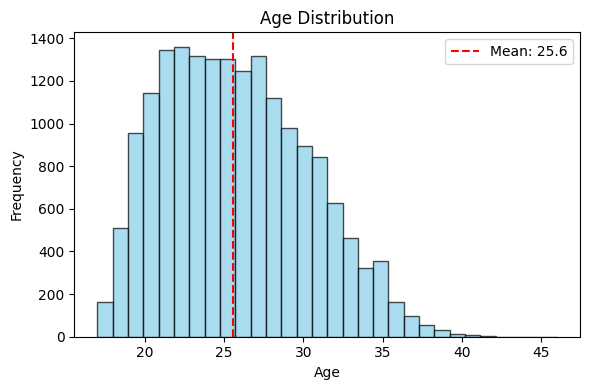

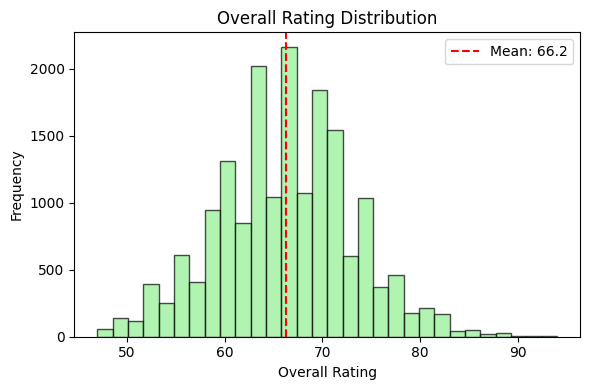

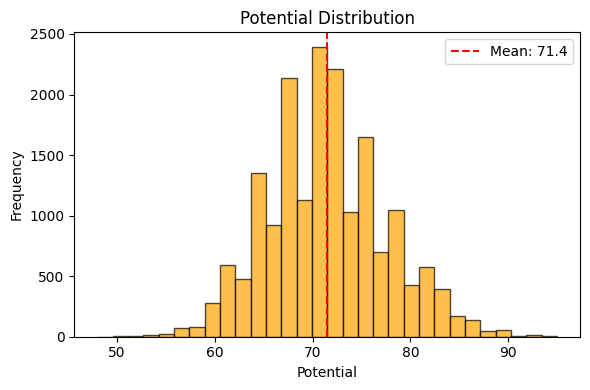

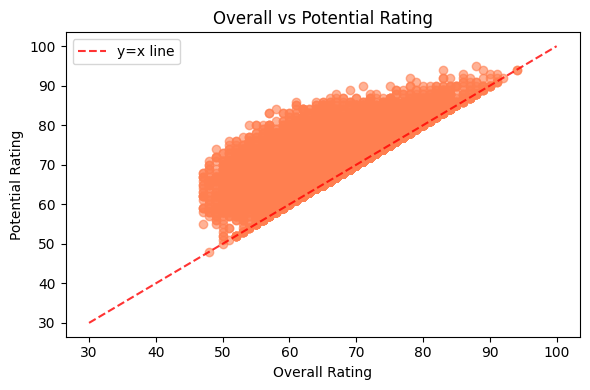

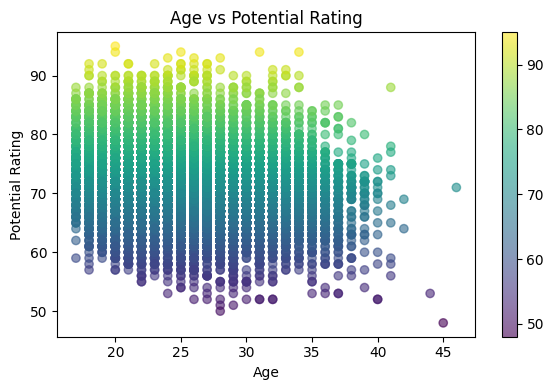

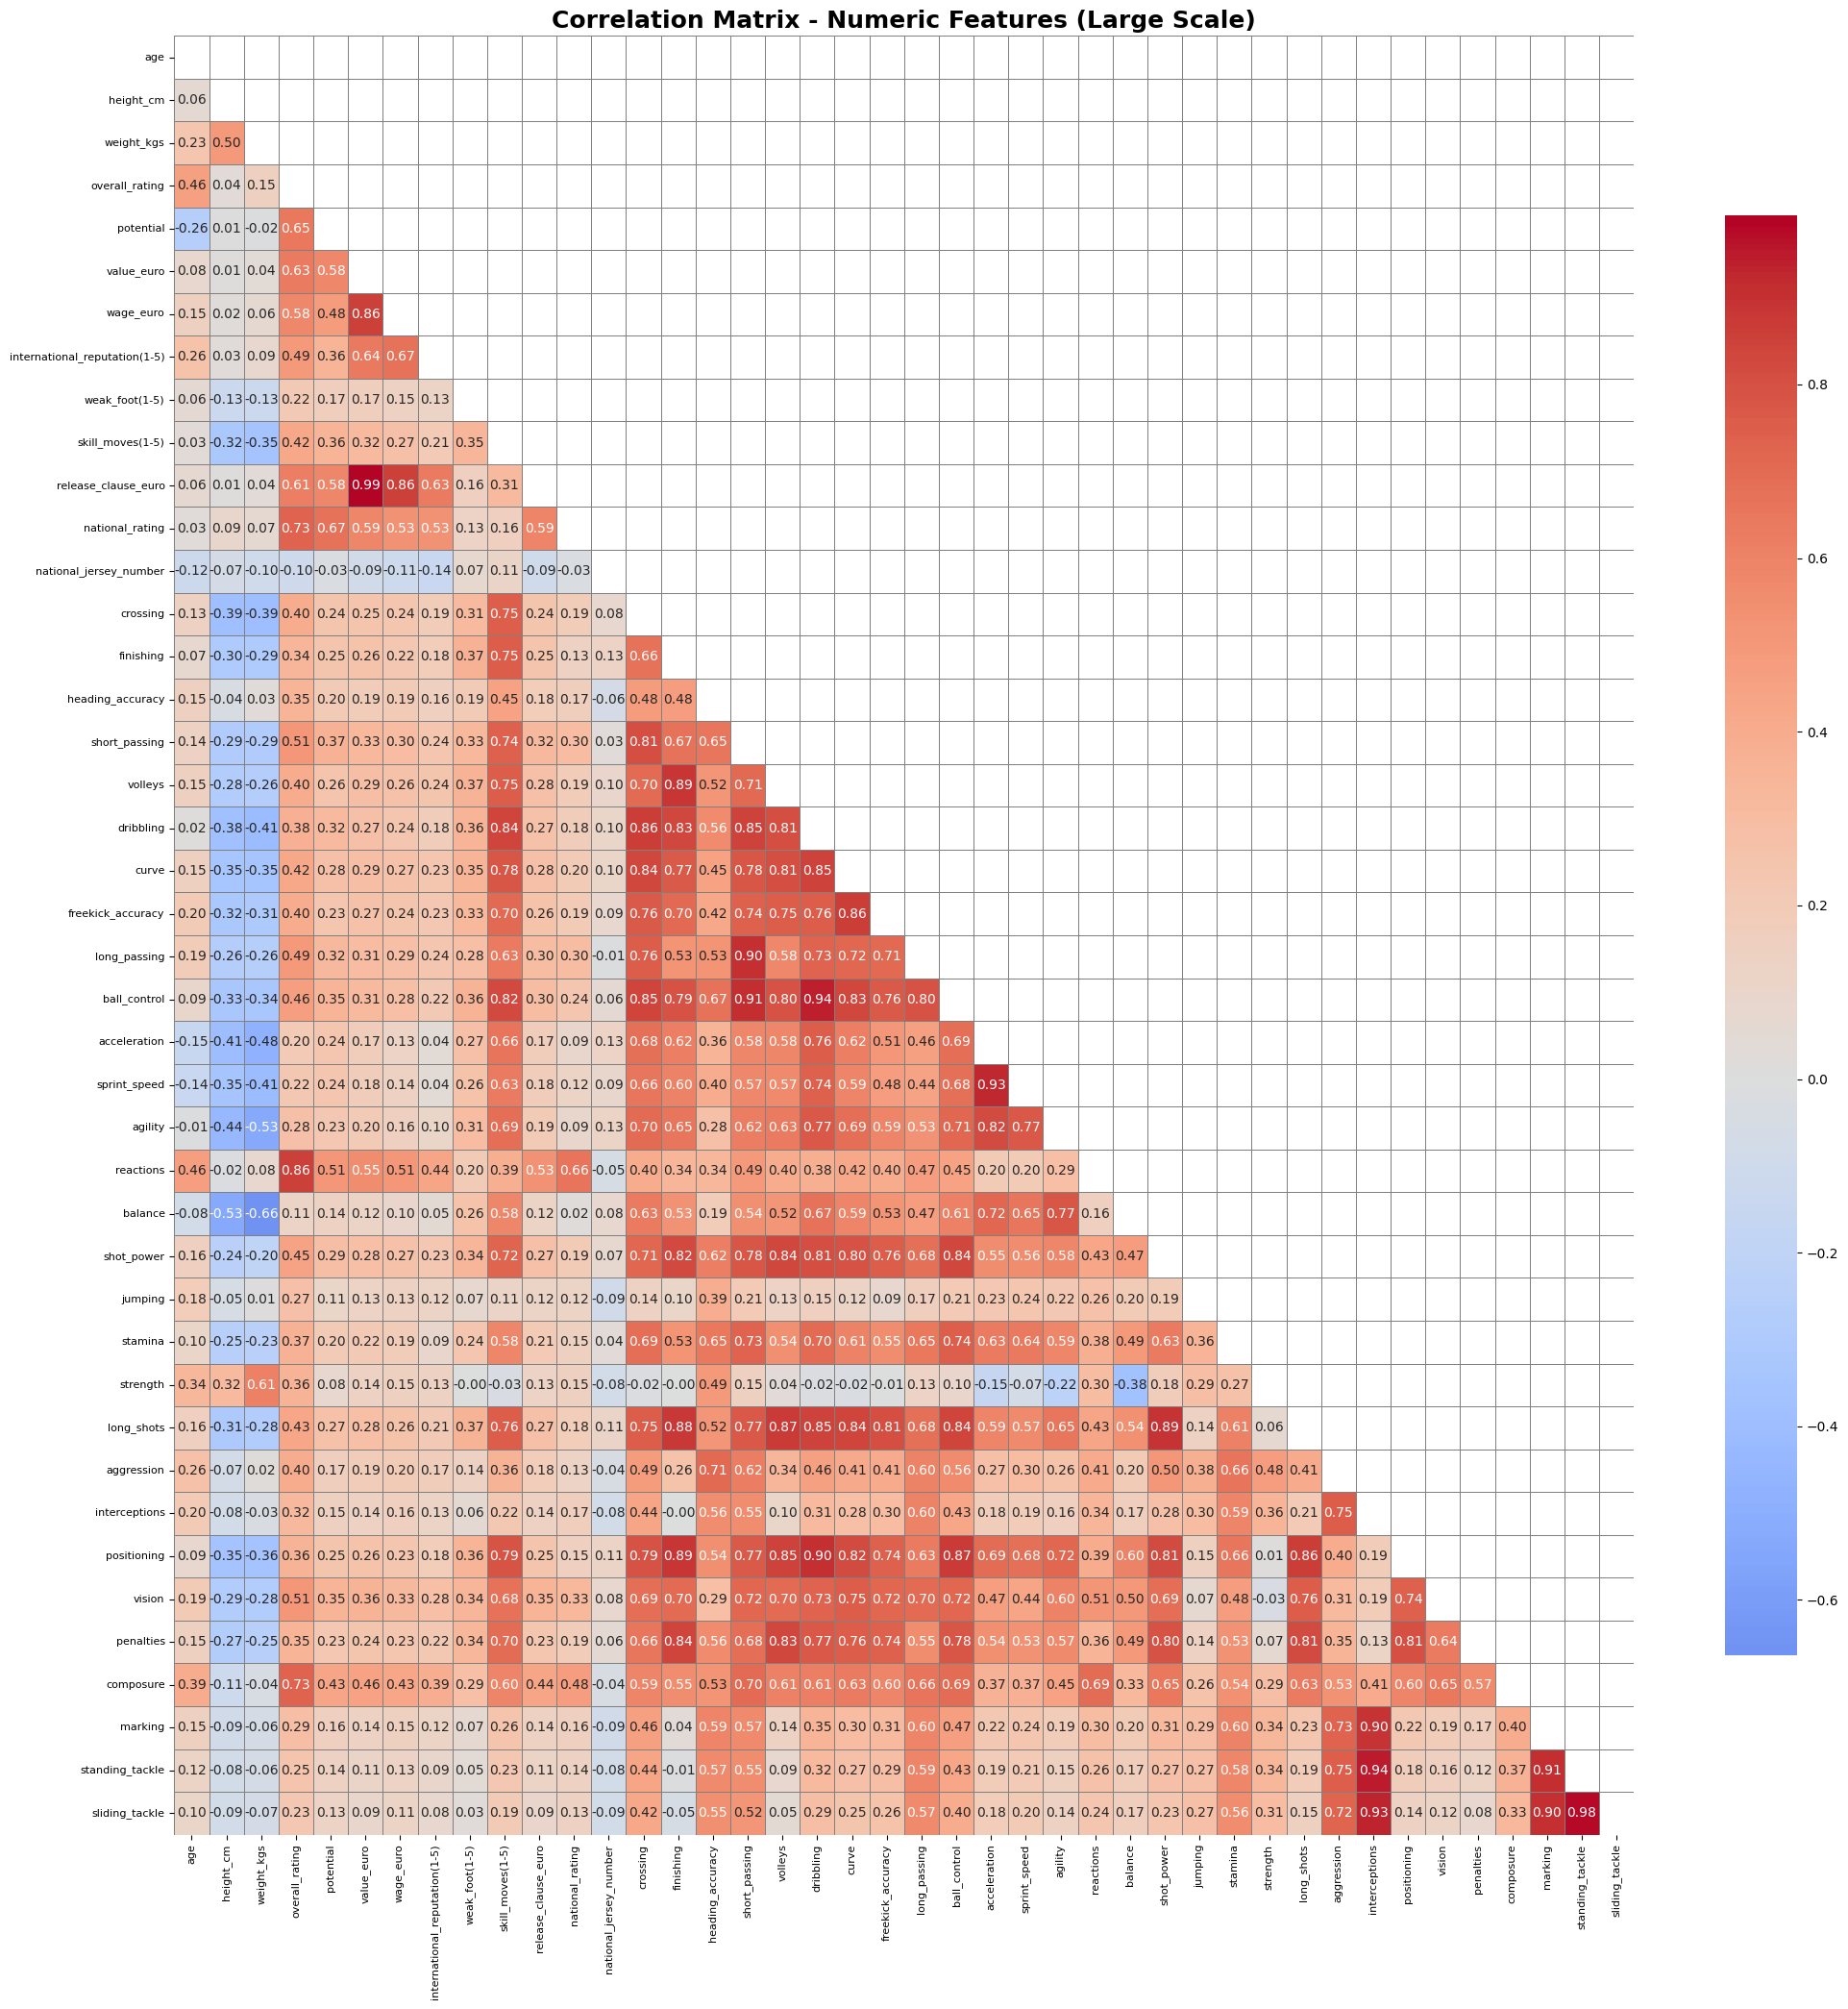


Top 10 correlations with Overall Rating:
   1. overall_rating           : 1.000
   2. reactions                : 0.856
   3. national_rating          : 0.733
   4. composure                : 0.729
   5. potential                : 0.647
   6. value_euro               : 0.631
   7. release_clause_euro      : 0.615
   8. wage_euro                : 0.577
   9. short_passing            : 0.507
  10. vision                   : 0.507

Top 10 correlations with Potential Rating:
   1. potential                : 1.000
   2. national_rating          : 0.665
   3. overall_rating           : 0.647
   4. release_clause_euro      : 0.584
   5. value_euro               : 0.576
   6. reactions                : 0.505
   7. wage_euro                : 0.484
   8. composure                : 0.434
   9. short_passing            : 0.368
  10. international_reputation(1-5): 0.359


In [4]:
# ================================================================
# 1.2 EXPLORATORY VISUALIZATIONS
# ================================================================

print("\n1.2 EXPLORATORY VISUALIZATIONS")
print("-"*40)

# Age distribution
if 'age' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overall rating distribution
if 'overall_rating' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['overall_rating'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Overall Rating Distribution')
    plt.xlabel('Overall Rating')
    plt.ylabel('Frequency')
    plt.axvline(df['overall_rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["overall_rating"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Potential distribution
if 'potential' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['potential'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Potential Distribution')
    plt.xlabel('Potential')
    plt.ylabel('Frequency')
    plt.axvline(df['potential'].mean(), color='red', linestyle='--', label=f'Mean: {df["potential"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Overall vs Potential scatter plot
if 'overall_rating' in df.columns and 'potential' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df['overall_rating'], df['potential'], alpha=0.6, color='coral')
    plt.plot([30, 100], [30, 100], 'r--', alpha=0.8, label='y=x line')
    plt.title('Overall vs Potential Rating')
    plt.xlabel('Overall Rating')
    plt.ylabel('Potential Rating')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Age vs Potential scatter plot
if 'age' in df.columns and 'potential' in df.columns:
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(df['age'], df['potential'], alpha=0.6, c=df['potential'], cmap='viridis')
    plt.title('Age vs Potential Rating')
    plt.xlabel('Age')
    plt.ylabel('Potential Rating')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(max(20, len(numeric_cols) * 0.5), max(18, len(numeric_cols) * 0.5)))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=False,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Correlation Matrix - Numeric Features (Large Scale)', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Display top correlations with target variables
if 'overall_rating' in correlation_matrix.columns:
    print("\nTop 10 correlations with Overall Rating:")
    overall_corr = correlation_matrix['overall_rating'].abs().sort_values(ascending=False)
    for i, (feature, corr) in enumerate(overall_corr.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<25}: {corr:.3f}")

if 'potential' in correlation_matrix.columns:
    print("\nTop 10 correlations with Potential Rating:")
    potential_corr = correlation_matrix['potential'].abs().sort_values(ascending=False)
    for i, (feature, corr) in enumerate(potential_corr.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<25}: {corr:.3f}")

In [5]:
# ================================================================
# 2. DATA PREPARATION
# ================================================================

print("\n" + "="*60)
print("2. DATA PREPARATION")
print("="*60)

# ================================================================
# 2.1 DATA CLEANING
# ================================================================

print("\n2.1 DATA CLEANING")
print("-"*40)

# Create a copy for processing
df_clean = df.copy()

# Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Removed {initial_rows - len(df_clean)} duplicate rows")

# Display categorical distributions before cleaning
print("\nCategorical Variables Distribution:")
categorical_cols = ['positions', 'nationality', 'preferred_foot', 'body_type']

for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n{col} distribution:")
        print(df_clean[col].value_counts().head(10))

# Clean body_type column
if 'body_type' in df_clean.columns:
    print(f"\nBody type distribution (before cleaning):")
    print(df_clean['body_type'].value_counts())
    
    # Remove noise values
    noise_values = ['Messi', 'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Shaqiri', 
                   'Neymar', 'C. Ronaldo', 'Courtois']
    df_clean = df_clean[~df_clean['body_type'].isin(noise_values)]
    
    print(f"\nBody type distribution (after cleaning):")
    print(df_clean['body_type'].value_counts())

# Filter rows with missing target variables
print(f"\nFiltering rows with missing target variables...")
initial_rows = len(df_clean)

# Keep only rows where both targets are available
df_clean = df_clean[
    df_clean['overall_rating'].notna() & 
    df_clean['potential'].notna()
].copy()

filtered_rows = len(df_clean)
print(f"Rows after target filtering: {filtered_rows:,} (removed {initial_rows - filtered_rows:,} rows)")


2. DATA PREPARATION

2.1 DATA CLEANING
----------------------------------------
Removed 0 duplicate rows

Categorical Variables Distribution:

positions distribution:
positions
CB        2243
GK        2065
ST        1747
CM         764
CDM,CM     709
LB         672
CM,CDM     632
RB         605
CDM        321
CB,RB      268
Name: count, dtype: int64

nationality distribution:
nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: count, dtype: int64

preferred_foot distribution:
preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64

body_type distribution:
body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar       

In [6]:
# ================================================================
# 2.2 FEATURE ENGINEERING
# ================================================================

print("\n2.2 FEATURE ENGINEERING")
print("-"*40)

# Define feature categories
physical_features = ['age', 'height_cm', 'weight_kgs']
categorical_features = ['positions', 'preferred_foot', 'body_type']
rating_features = ['international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)']

# Technical skills
technical_skills = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'marking', 'standing_tackle', 'sliding_tackle'
]

# Select available features
available_physical = [f for f in physical_features if f in df_clean.columns]
available_rating = [f for f in rating_features if f in df_clean.columns]
available_technical = [f for f in technical_skills if f in df_clean.columns]

print(f"Available features:")
print(f"  Physical features: {len(available_physical)}")
print(f"  Rating features: {len(available_rating)}")
print(f"  Technical skills: {len(available_technical)}")

# Combine all numeric features
model_features_numeric = available_physical + available_rating + available_technical
print(f"\nTotal numeric features: {len(model_features_numeric)}")

# Create composite features
df_featured = df_clean.copy()

# Pace composite
if 'acceleration' in df_clean.columns and 'sprint_speed' in df_clean.columns:
    df_featured['pace_composite'] = (df_clean['acceleration'] * 0.4 + 
                                   df_clean['sprint_speed'] * 0.6)
    model_features_numeric.append('pace_composite')
    # Remove individual components
    model_features_numeric = [f for f in model_features_numeric if f not in ['acceleration', 'sprint_speed']]
    print("Created pace_composite feature")

# Shooting composite
shooting_skills = ['finishing', 'shot_power', 'long_shots', 'volleys', 'penalties']
available_shooting = [s for s in shooting_skills if s in df_clean.columns]

if len(available_shooting) >= 3:
    df_featured['shooting_composite'] = df_clean[available_shooting].mean(axis=1)
    model_features_numeric.append('shooting_composite')
    # Remove individual components
    model_features_numeric = [f for f in model_features_numeric if f not in shooting_skills]
    print("Created shooting_composite feature")

# Passing composite
passing_skills = ['short_passing', 'long_passing', 'vision', 'crossing', 'freekick_accuracy']
available_passing = [s for s in passing_skills if s in df_clean.columns]

if len(available_passing) >= 3:
    df_featured['passing_composite'] = df_clean[available_passing].mean(axis=1)
    model_features_numeric.append('passing_composite')
    # Remove individual components
    model_features_numeric = [f for f in model_features_numeric if f not in passing_skills]
    print("Created passing_composite feature")

# Defending composite
defending_skills = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions']
available_defending = [s for s in defending_skills if s in df_clean.columns]

if len(available_defending) >= 3:
    df_featured['defending_composite'] = df_clean[available_defending].mean(axis=1)
    model_features_numeric.append('defending_composite')
    # Remove individual components
    model_features_numeric = [f for f in model_features_numeric if f not in defending_skills]
    print("Created defending_composite feature")

# Physical composite
physical_skills = ['strength', 'jumping', 'stamina', 'balance', 'agility']
available_physical_skills = [s for s in physical_skills if s in df_clean.columns]

if len(available_physical_skills) >= 3:
    df_featured['physical_composite'] = df_clean[available_physical_skills].mean(axis=1)
    model_features_numeric.append('physical_composite')
    # Remove individual components
    model_features_numeric = [f for f in model_features_numeric if f not in physical_skills]
    print("Created physical_composite feature")

print(f"\nFinal numeric features count: {len(model_features_numeric)}")


2.2 FEATURE ENGINEERING
----------------------------------------
Available features:
  Physical features: 3
  Rating features: 3
  Technical skills: 29

Total numeric features: 35
Created pace_composite feature
Created shooting_composite feature
Created passing_composite feature
Created defending_composite feature
Created physical_composite feature

Final numeric features count: 19


In [7]:
# ================================================================
# 2.3 CATEGORICAL ENCODING
# ================================================================

print("\n2.3 CATEGORICAL ENCODING")
print("-"*40)

# Categorical features to encode
categorical_features = ['positions', 'preferred_foot', 'body_type']

# Store encoders for later use
categorical_encoders = {}
encoded_features = []

for cat_feature in categorical_features:
    if cat_feature in df_featured.columns:
        # Label encoding
        le = LabelEncoder()
        encoded_col = f'{cat_feature}_encoded'
        df_featured[encoded_col] = le.fit_transform(df_featured[cat_feature].astype(str))
        
        encoded_features.append(encoded_col)
        categorical_encoders[cat_feature] = le
        
        print(f"Encoded {cat_feature}: {df_featured[cat_feature].nunique()} unique values")

# Final feature list
model_features_final = model_features_numeric + encoded_features
print(f"\nFinal model features: {len(model_features_final)}")


2.3 CATEGORICAL ENCODING
----------------------------------------
Encoded positions: 889 unique values
Encoded preferred_foot: 2 unique values
Encoded body_type: 3 unique values

Final model features: 22


In [8]:
# ================================================================
# 2.4 MISSING VALUE HANDLING
# ================================================================

print("\n2.4 MISSING VALUE HANDLING")
print("-"*40)

# Check for missing values in model features
missing_count = df_featured[model_features_final].isnull().sum()
total_missing = missing_count.sum()

print(f"Missing values in model features:")
if total_missing > 0:
    print(missing_count[missing_count > 0])
    
    # Use median imputation
    imputer = SimpleImputer(strategy='median')
    df_featured[model_features_final] = imputer.fit_transform(df_featured[model_features_final])
    print(f"✅ {total_missing} missing values filled with median")
else:
    print("✅ No missing values found in model features")
    imputer = None

# Final dataset preparation
X = df_featured[model_features_final].copy()
y_overall = df_featured['overall_rating'].copy()
y_potential = df_featured['potential'].copy()

print(f"\nFinal dataset ready:")
print(f"  Feature matrix shape: {X.shape}")
print(f"  Target variables: {len(y_overall)} samples each")


2.4 MISSING VALUE HANDLING
----------------------------------------
Missing values in model features:
✅ No missing values found in model features

Final dataset ready:
  Feature matrix shape: (17947, 22)
  Target variables: 17947 samples each


In [9]:
# ================================================================
# 3. MACHINE LEARNING MODEL
# ================================================================

print("\n" + "="*60)
print("3. MACHINE LEARNING MODEL")
print("="*60)

# ================================================================
# 3.1 TRAIN-TEST SPLIT
# ================================================================

print("\n3.1 TRAIN-TEST SPLIT")
print("-"*40)

# Split data for both targets
X_train, X_test, y_overall_train, y_overall_test = train_test_split(
    X, y_overall, test_size=0.2, random_state=42
)

# Use same indices for potential target
_, _, y_potential_train, y_potential_test = train_test_split(
    X, y_potential, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train):,} samples")
print(f"Test set size: {len(X_test):,} samples")
print(f"Training percentage: {len(X_train) / (len(X_train) + len(X_test)) * 100:.1f}%")


3. MACHINE LEARNING MODEL

3.1 TRAIN-TEST SPLIT
----------------------------------------
Training set size: 14,357 samples
Test set size: 3,590 samples
Training percentage: 80.0%


In [10]:
# ================================================================
# 3.2 FEATURE SCALING
# ================================================================

print("\n3.2 FEATURE SCALING")
print("-"*40)

# Scale features (good practice even for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Feature scaling completed")


3.2 FEATURE SCALING
----------------------------------------
✅ Feature scaling completed


In [11]:
# ================================================================
# 3.3 HYPERPARAMETER TUNING - OVERALL RATING
# ================================================================

print("\n3.3 HYPERPARAMETER TUNING - OVERALL RATING")
print("-"*40)

# Define parameter grid
param_grid = {
    # 'n_estimators': [100, 200, 300],
    'n_estimators': [100, 200],
    # 'max_depth': [10, 15, 20, None],
    'max_depth': [10, 20],
    # 'min_samples_split': [2, 5, 10],
    'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2, 4],
    'min_samples_leaf': [1, 2],
    # 'max_features': ['sqrt', 'log2']
    'max_features': ['sqrt']
}

print(f"Parameter combinations to test: {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])}")

# Create and tune model
rf_overall = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_overall = GridSearchCV(
    estimator=rf_overall,
    param_grid=param_grid,
    # cv=5,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the model (use original features, not scaled for Random Forest)
print("🔍 Starting hyperparameter tuning...")
grid_search_overall.fit(X_train, y_overall_train)

# Get best model
best_rf_overall = grid_search_overall.best_estimator_

print(f"✅ Best parameters for Overall Rating:")
for param, value in grid_search_overall.best_params_.items():
    print(f"   {param}: {value}")

print(f"✅ Best CV Score (R²): {grid_search_overall.best_score_:.4f}")


3.3 HYPERPARAMETER TUNING - OVERALL RATING
----------------------------------------
Parameter combinations to test: 16
🔍 Starting hyperparameter tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best parameters for Overall Rating:
   max_depth: 20
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 200
✅ Best CV Score (R²): 0.9351


In [12]:
# ================================================================
# 3.4 HYPERPARAMETER TUNING - POTENTIAL RATING
# ================================================================

print("\n3.4 HYPERPARAMETER TUNING - POTENTIAL RATING")
print("-"*40)

# Create and tune model for potential
rf_potential = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_potential = GridSearchCV(
    estimator=rf_potential,
    param_grid=param_grid,
    # cv=5,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the model
print("🔍 Starting hyperparameter tuning...")
grid_search_potential.fit(X_train, y_potential_train)

# Get best model
best_rf_potential = grid_search_potential.best_estimator_

print(f"✅ Best parameters for Potential Rating:")
for param, value in grid_search_potential.best_params_.items():
    print(f"   {param}: {value}")

print(f"✅ Best CV Score (R²): {grid_search_potential.best_score_:.4f}")


3.4 HYPERPARAMETER TUNING - POTENTIAL RATING
----------------------------------------
🔍 Starting hyperparameter tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best parameters for Potential Rating:
   max_depth: 20
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 200
✅ Best CV Score (R²): 0.8144


In [13]:
# ================================================================
# 3.5 MAKE PREDICTIONS
# ================================================================

print("\n3.5 MAKE PREDICTIONS")
print("-"*40)

# Make predictions
y_overall_pred_train = best_rf_overall.predict(X_train)
y_overall_pred_test = best_rf_overall.predict(X_test)

y_potential_pred_train = best_rf_potential.predict(X_train)
y_potential_pred_test = best_rf_potential.predict(X_test)

print("✅ Predictions completed for both models")


3.5 MAKE PREDICTIONS
----------------------------------------
✅ Predictions completed for both models


In [14]:
# ================================================================
# 3.6 FEATURE IMPORTANCE ANALYSIS
# ================================================================

print("\n3.6 FEATURE IMPORTANCE ANALYSIS")
print("-"*40)

# Get feature importance for Overall Rating
feature_importance_overall = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf_overall.feature_importances_
}).sort_values('importance', ascending=False)

print("🏆 Top 15 Most Important Features for Overall Rating:")
for i, (_, row) in enumerate(feature_importance_overall.head(15).iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:<25} : {row['importance']:.4f}")

# Get feature importance for Potential Rating
feature_importance_potential = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf_potential.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🏆 Top 15 Most Important Features for Potential Rating:")
for i, (_, row) in enumerate(feature_importance_potential.head(15).iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:<25} : {row['importance']:.4f}")


3.6 FEATURE IMPORTANCE ANALYSIS
----------------------------------------
🏆 Top 15 Most Important Features for Overall Rating:
    1. reactions                 : 0.2399
    2. composure                 : 0.1346
    3. ball_control              : 0.1121
    4. defending_composite       : 0.0861
    5. dribbling                 : 0.0603
    6. age                       : 0.0571
    7. passing_composite         : 0.0554
    8. positioning               : 0.0468
    9. international_reputation(1-5) : 0.0376
   10. heading_accuracy          : 0.0376
   11. shooting_composite        : 0.0290
   12. aggression                : 0.0210
   13. physical_composite        : 0.0196
   14. curve                     : 0.0142
   15. pace_composite            : 0.0116

🏆 Top 15 Most Important Features for Potential Rating:
    1. age                       : 0.2089
    2. reactions                 : 0.1278
    3. ball_control              : 0.1114
    4. defending_composite       : 0.0843
    5. dribblin

In [15]:
# ================================================================
# 3.7 SAVE MODELS
# ================================================================

print("\n3.7 SAVE MODELS")
print("-"*40)

# Save models
joblib.dump(best_rf_overall, 'rf_overall_model.pkl')
joblib.dump(best_rf_potential, 'rf_potential_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save model components
model_components = {
    'feature_names': model_features_final,
    'categorical_encoders': categorical_encoders,
    'feature_importance_overall': feature_importance_overall,
    'feature_importance_potential': feature_importance_potential
}

joblib.dump(model_components, 'model_components.pkl')

print("✅ Models saved successfully!")
print("   - rf_overall_model.pkl")
print("   - rf_potential_model.pkl")
print("   - feature_scaler.pkl")
print("   - model_components.pkl")


3.7 SAVE MODELS
----------------------------------------
✅ Models saved successfully!
   - rf_overall_model.pkl
   - rf_potential_model.pkl
   - feature_scaler.pkl
   - model_components.pkl


In [16]:
# ================================================================
# 4. MODEL EVALUATION
# ================================================================

print("\n" + "="*60)
print("4. MODEL EVALUATION")
print("="*60)

# ================================================================
# 4.1 CALCULATE METRICS
# ================================================================

print("\n4.1 PERFORMANCE METRICS")
print("-"*40)

# Calculate comprehensive metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape
    }

# Calculate metrics for Overall Rating
overall_train_metrics = calculate_metrics(y_overall_train, y_overall_pred_train)
overall_test_metrics = calculate_metrics(y_overall_test, y_overall_pred_test)

print("📊 OVERALL RATING MODEL:")
print("Training Set:")
for metric, value in overall_train_metrics.items():
    print(f"   {metric:<8}: {value:.4f}")

print("Test Set:")
for metric, value in overall_test_metrics.items():
    print(f"   {metric:<8}: {value:.4f}")

# Calculate metrics for Potential Rating
potential_train_metrics = calculate_metrics(y_potential_train, y_potential_pred_train)
potential_test_metrics = calculate_metrics(y_potential_test, y_potential_pred_test)

print("\n📊 POTENTIAL RATING MODEL:")
print("Training Set:")
for metric, value in potential_train_metrics.items():
    print(f"   {metric:<8}: {value:.4f}")

print("Test Set:")
for metric, value in potential_test_metrics.items():
    print(f"   {metric:<8}: {value:.4f}")


4. MODEL EVALUATION

4.1 PERFORMANCE METRICS
----------------------------------------
📊 OVERALL RATING MODEL:
Training Set:
   MSE     : 0.4585
   RMSE    : 0.6771
   MAE     : 0.4746
   R²      : 0.9905
   MAPE    : 0.7343
Test Set:
   MSE     : 3.0022
   RMSE    : 1.7327
   MAE     : 1.2315
   R²      : 0.9383
   MAPE    : 1.9218

📊 POTENTIAL RATING MODEL:
Training Set:
   MSE     : 1.1412
   RMSE    : 1.0683
   MAE     : 0.7836
   R²      : 0.9697
   MAPE    : 1.1110
Test Set:
   MSE     : 6.5800
   RMSE    : 2.5652
   MAE     : 1.8969
   R²      : 0.8198
   MAPE    : 2.6977


In [17]:
# ================================================================
# 4.2 ACCURACY ANALYSIS
# ================================================================

print("\n4.2 ACCURACY ANALYSIS")
print("-"*40)

# Calculate accuracy within tolerance
def accuracy_within_tolerance(y_true, y_pred, tolerance=1):
    within_tolerance = np.abs(y_true - y_pred) <= tolerance
    return np.mean(within_tolerance) * 100

# Test different tolerances
tolerances = [1, 2, 3, 5]

print("🎯 OVERALL RATING - Accuracy within tolerance:")
for tol in tolerances:
    train_acc = accuracy_within_tolerance(y_overall_train, y_overall_pred_train, tol)
    test_acc = accuracy_within_tolerance(y_overall_test, y_overall_pred_test, tol)
    print(f"   ±{tol} points: Train={train_acc:.1f}%, Test={test_acc:.1f}%")

print("\n🎯 POTENTIAL RATING - Accuracy within tolerance:")
for tol in tolerances:
    train_acc = accuracy_within_tolerance(y_potential_train, y_potential_pred_train, tol)
    test_acc = accuracy_within_tolerance(y_potential_test, y_potential_pred_test, tol)
    print(f"   ±{tol} points: Train={train_acc:.1f}%, Test={test_acc:.1f}%")


4.2 ACCURACY ANALYSIS
----------------------------------------
🎯 OVERALL RATING - Accuracy within tolerance:
   ±1 points: Train=89.9%, Test=54.4%
   ±2 points: Train=98.2%, Test=82.7%
   ±3 points: Train=99.7%, Test=92.7%
   ±5 points: Train=100.0%, Test=98.1%

🎯 POTENTIAL RATING - Accuracy within tolerance:
   ±1 points: Train=72.3%, Test=37.8%
   ±2 points: Train=92.7%, Test=64.1%
   ±3 points: Train=98.4%, Test=80.4%
   ±5 points: Train=99.9%, Test=93.5%


In [18]:
# ================================================================
# 4.3 CROSS-VALIDATION
# ================================================================

print("\n4.3 CROSS-VALIDATION")
print("-"*40)

# Perform cross-validation
cv_scores_overall = cross_val_score(best_rf_overall, X_train, y_overall_train, 
                                   cv=5, scoring='r2', n_jobs=-1)
cv_scores_potential = cross_val_score(best_rf_potential, X_train, y_potential_train, 
                                     cv=5, scoring='r2', n_jobs=-1)

print("🎯 Cross-Validation Results (5-Fold):")
print(f"\nOverall Rating Model:")
print(f"   CV Scores: {[f'{score:.4f}' for score in cv_scores_overall]}")
print(f"   Mean: {cv_scores_overall.mean():.4f}")
print(f"   Std: {cv_scores_overall.std():.4f}")

print(f"\nPotential Rating Model:")
print(f"   CV Scores: {[f'{score:.4f}' for score in cv_scores_potential]}")
print(f"   Mean: {cv_scores_potential.mean():.4f}")
print(f"   Std: {cv_scores_potential.std():.4f}")


4.3 CROSS-VALIDATION
----------------------------------------
🎯 Cross-Validation Results (5-Fold):

Overall Rating Model:
   CV Scores: ['0.9356', '0.9413', '0.9363', '0.9312', '0.9350']
   Mean: 0.9359
   Std: 0.0032

Potential Rating Model:
   CV Scores: ['0.8173', '0.8209', '0.8152', '0.8148', '0.8244']
   Mean: 0.8185
   Std: 0.0037



4.4 CONFUSION MATRIX FOR REGRESSION
----------------------------------------
🎯 Overall Rating Confusion Matrix:


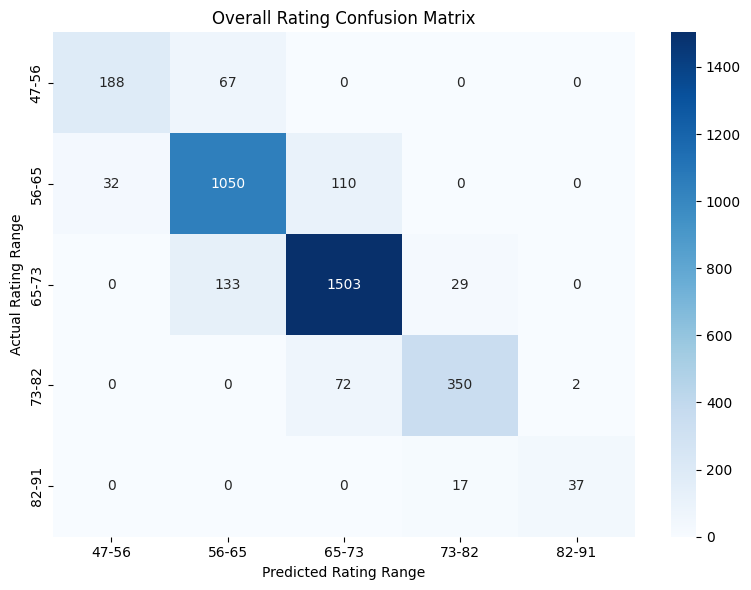

Overall Rating Confusion Matrix Accuracy: 87.1%

🎯 Potential Rating Confusion Matrix:


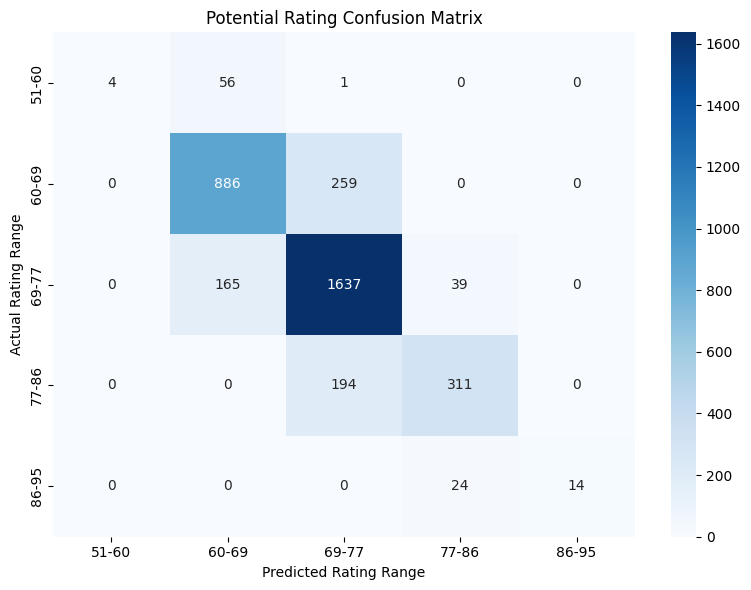

Potential Rating Confusion Matrix Accuracy: 79.4%


In [19]:
# ================================================================
# 4.4 CONFUSION MATRIX FOR REGRESSION
# ================================================================

print("\n4.4 CONFUSION MATRIX FOR REGRESSION")
print("-"*40)

# Create confusion matrix by binning predictions
def create_regression_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    # Create bins
    bins = 5
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    bin_edges = np.linspace(min_val, max_val, bins + 1)
    
    # Create bin labels
    bin_labels = [f"{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}" for i in range(bins)]
    
    # Digitize values
    y_true_binned = np.digitize(y_true, bin_edges) - 1
    y_pred_binned = np.digitize(y_pred, bin_edges) - 1
    
    # Handle edge cases
    y_true_binned = np.clip(y_true_binned, 0, bins - 1)
    y_pred_binned = np.clip(y_pred_binned, 0, bins - 1)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true_binned, y_pred_binned)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=bin_labels, yticklabels=bin_labels)
    plt.title(title)
    plt.xlabel('Predicted Rating Range')
    plt.ylabel('Actual Rating Range')
    plt.tight_layout()
    plt.show()
    
    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm) * 100
    print(f"{title} Accuracy: {accuracy:.1f}%")
    
    return cm

# Create confusion matrices
print("🎯 Overall Rating Confusion Matrix:")
cm_overall = create_regression_confusion_matrix(y_overall_test, y_overall_pred_test, 
                                              "Overall Rating Confusion Matrix")

print("\n🎯 Potential Rating Confusion Matrix:")
cm_potential = create_regression_confusion_matrix(y_potential_test, y_potential_pred_test, 
                                                "Potential Rating Confusion Matrix")



4.5 RESIDUAL ANALYSIS
----------------------------------------


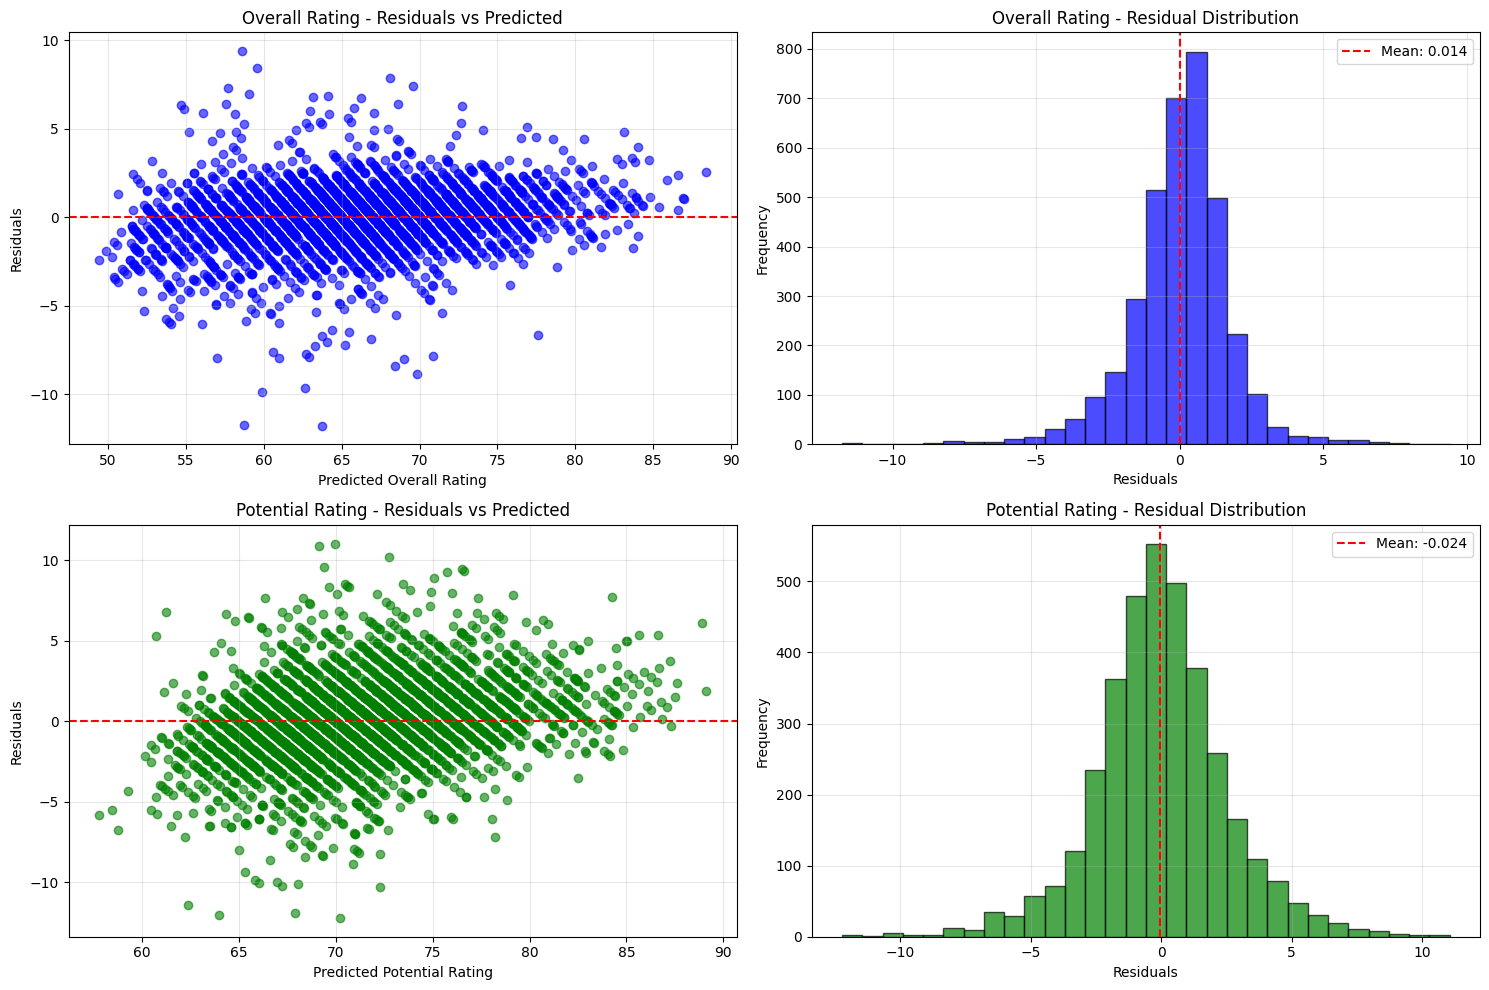

📊 Residual Analysis:

Overall Rating Residuals:
   Mean: 0.0141
   Std: 1.7329
   Min: -11.7582
   Max: 9.3969

Potential Rating Residuals:
   Mean: -0.0237
   Std: 2.5654
   Min: -12.2146
   Max: 11.0456


In [20]:
# ================================================================
# 4.5 RESIDUAL ANALYSIS
# ================================================================

print("\n4.5 RESIDUAL ANALYSIS")
print("-"*40)

# Calculate residuals
overall_residuals = y_overall_test - y_overall_pred_test
potential_residuals = y_potential_test - y_potential_pred_test

# Plot residuals
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall Rating Residuals vs Predicted
axes[0, 0].scatter(y_overall_pred_test, overall_residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Predicted Overall Rating')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Overall Rating - Residuals vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

# Overall Rating Residual Distribution
axes[0, 1].hist(overall_residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].axvline(overall_residuals.mean(), color='red', linestyle='--', 
                   label=f'Mean: {overall_residuals.mean():.3f}')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Overall Rating - Residual Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Potential Rating Residuals vs Predicted
axes[1, 0].scatter(y_potential_pred_test, potential_residuals, alpha=0.6, color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Potential Rating')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Potential Rating - Residuals vs Predicted')
axes[1, 0].grid(True, alpha=0.3)

# Potential Rating Residual Distribution
axes[1, 1].hist(potential_residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].axvline(potential_residuals.mean(), color='red', linestyle='--', 
                   label=f'Mean: {potential_residuals.mean():.3f}')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Potential Rating - Residual Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual statistics
print("📊 Residual Analysis:")
print(f"\nOverall Rating Residuals:")
print(f"   Mean: {overall_residuals.mean():.4f}")
print(f"   Std: {overall_residuals.std():.4f}")
print(f"   Min: {overall_residuals.min():.4f}")
print(f"   Max: {overall_residuals.max():.4f}")

print(f"\nPotential Rating Residuals:")
print(f"   Mean: {potential_residuals.mean():.4f}")
print(f"   Std: {potential_residuals.std():.4f}")
print(f"   Min: {potential_residuals.min():.4f}")
print(f"   Max: {potential_residuals.max():.4f}")


5. MODEL VISUALIZATION

5.1 ACTUAL VS PREDICTED SCATTER PLOTS
----------------------------------------


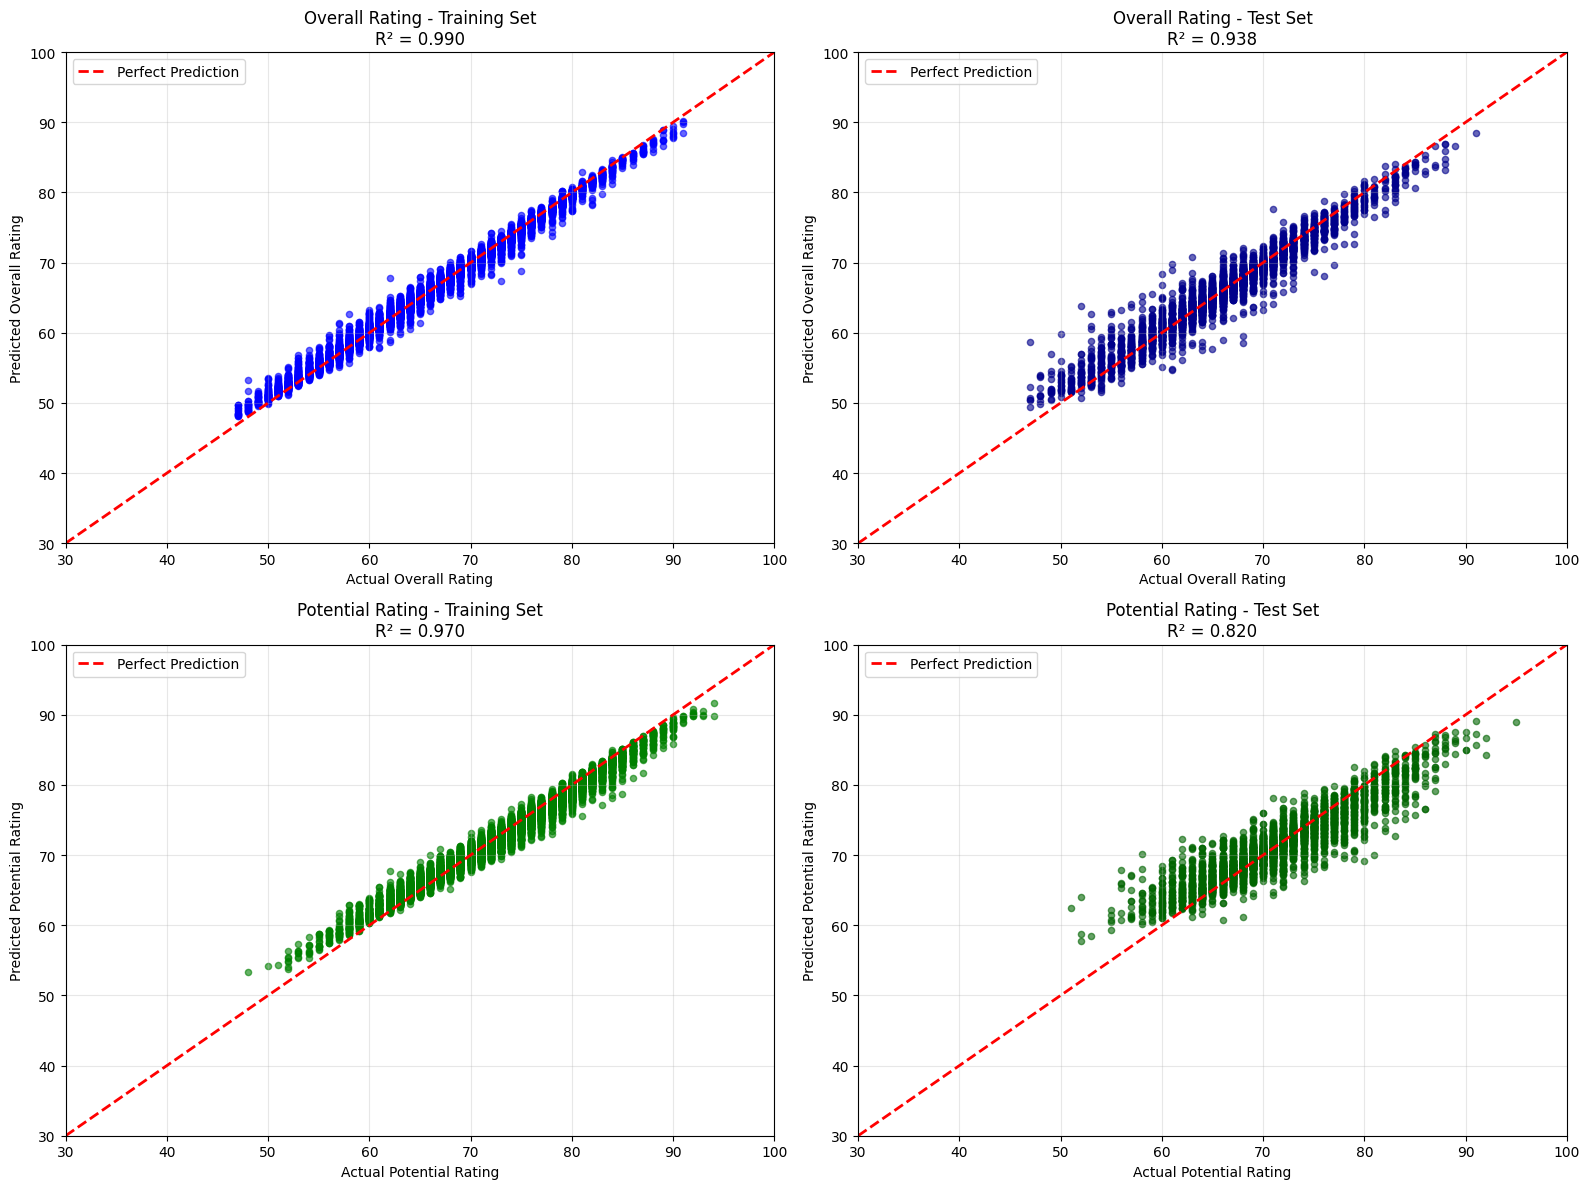

In [21]:
# ================================================================
# 5. MODEL VISUALIZATION
# ================================================================

print("\n" + "="*60)
print("5. MODEL VISUALIZATION")
print("="*60)

# ================================================================
# 5.1 ACTUAL VS PREDICTED SCATTER PLOTS
# ================================================================

print("\n5.1 ACTUAL VS PREDICTED SCATTER PLOTS")
print("-"*40)

# Create actual vs predicted plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall Rating - Training Set
axes[0, 0].scatter(y_overall_train, y_overall_pred_train, alpha=0.6, s=20, color='blue')
axes[0, 0].plot([30, 100], [30, 100], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Overall Rating')
axes[0, 0].set_ylabel('Predicted Overall Rating')
axes[0, 0].set_title(f'Overall Rating - Training Set\nR² = {overall_train_metrics["R²"]:.3f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(30, 100)
axes[0, 0].set_ylim(30, 100)

# Overall Rating - Test Set
axes[0, 1].scatter(y_overall_test, y_overall_pred_test, alpha=0.6, s=20, color='darkblue')
axes[0, 1].plot([30, 100], [30, 100], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Overall Rating')
axes[0, 1].set_ylabel('Predicted Overall Rating')
axes[0, 1].set_title(f'Overall Rating - Test Set\nR² = {overall_test_metrics["R²"]:.3f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(30, 100)
axes[0, 1].set_ylim(30, 100)

# Potential Rating - Training Set
axes[1, 0].scatter(y_potential_train, y_potential_pred_train, alpha=0.6, s=20, color='green')
axes[1, 0].plot([30, 100], [30, 100], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Potential Rating')
axes[1, 0].set_ylabel('Predicted Potential Rating')
axes[1, 0].set_title(f'Potential Rating - Training Set\nR² = {potential_train_metrics["R²"]:.3f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(30, 100)
axes[1, 0].set_ylim(30, 100)

# Potential Rating - Test Set
axes[1, 1].scatter(y_potential_test, y_potential_pred_test, alpha=0.6, s=20, color='darkgreen')
axes[1, 1].plot([30, 100], [30, 100], 'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Potential Rating')
axes[1, 1].set_ylabel('Predicted Potential Rating')
axes[1, 1].set_title(f'Potential Rating - Test Set\nR² = {potential_test_metrics["R²"]:.3f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(30, 100)
axes[1, 1].set_ylim(30, 100)

plt.tight_layout()
plt.show()


5.2 FEATURE IMPORTANCE VISUALIZATIONS
----------------------------------------


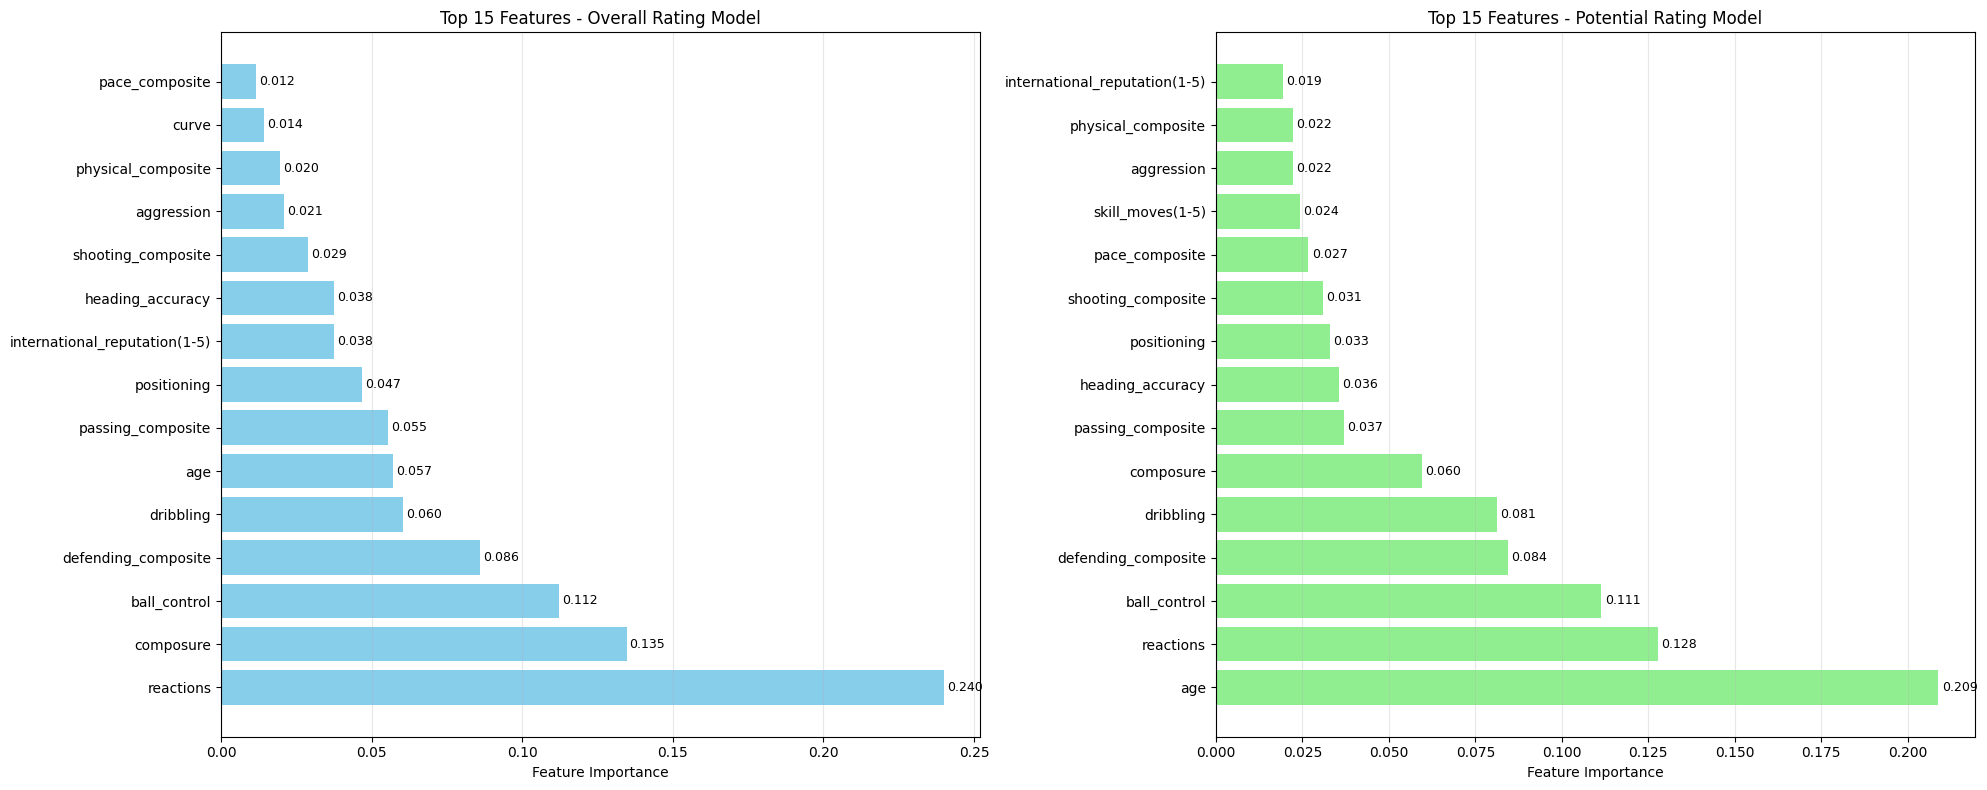

In [22]:
# ================================================================
# 5.2 FEATURE IMPORTANCE VISUALIZATIONS
# ================================================================

print("\n5.2 FEATURE IMPORTANCE VISUALIZATIONS")
print("-"*40)

# Create feature importance plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Overall Rating Feature Importance
top_features_overall = feature_importance_overall.head(15)
axes[0].barh(range(len(top_features_overall)), top_features_overall['importance'], color='skyblue')
axes[0].set_yticks(range(len(top_features_overall)))
axes[0].set_yticklabels(top_features_overall['feature'], fontsize=10)
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('Top 15 Features - Overall Rating Model')
axes[0].grid(True, alpha=0.3, axis='x')

# Add importance values on bars
for i, v in enumerate(top_features_overall['importance']):
    axes[0].text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)

# Potential Rating Feature Importance
top_features_potential = feature_importance_potential.head(15)
axes[1].barh(range(len(top_features_potential)), top_features_potential['importance'], color='lightgreen')
axes[1].set_yticks(range(len(top_features_potential)))
axes[1].set_yticklabels(top_features_potential['feature'], fontsize=10)
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Top 15 Features - Potential Rating Model')
axes[1].grid(True, alpha=0.3, axis='x')

# Add importance values on bars
for i, v in enumerate(top_features_potential['importance']):
    axes[1].text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


5.3 ERROR DISTRIBUTION VISUALIZATIONS
----------------------------------------


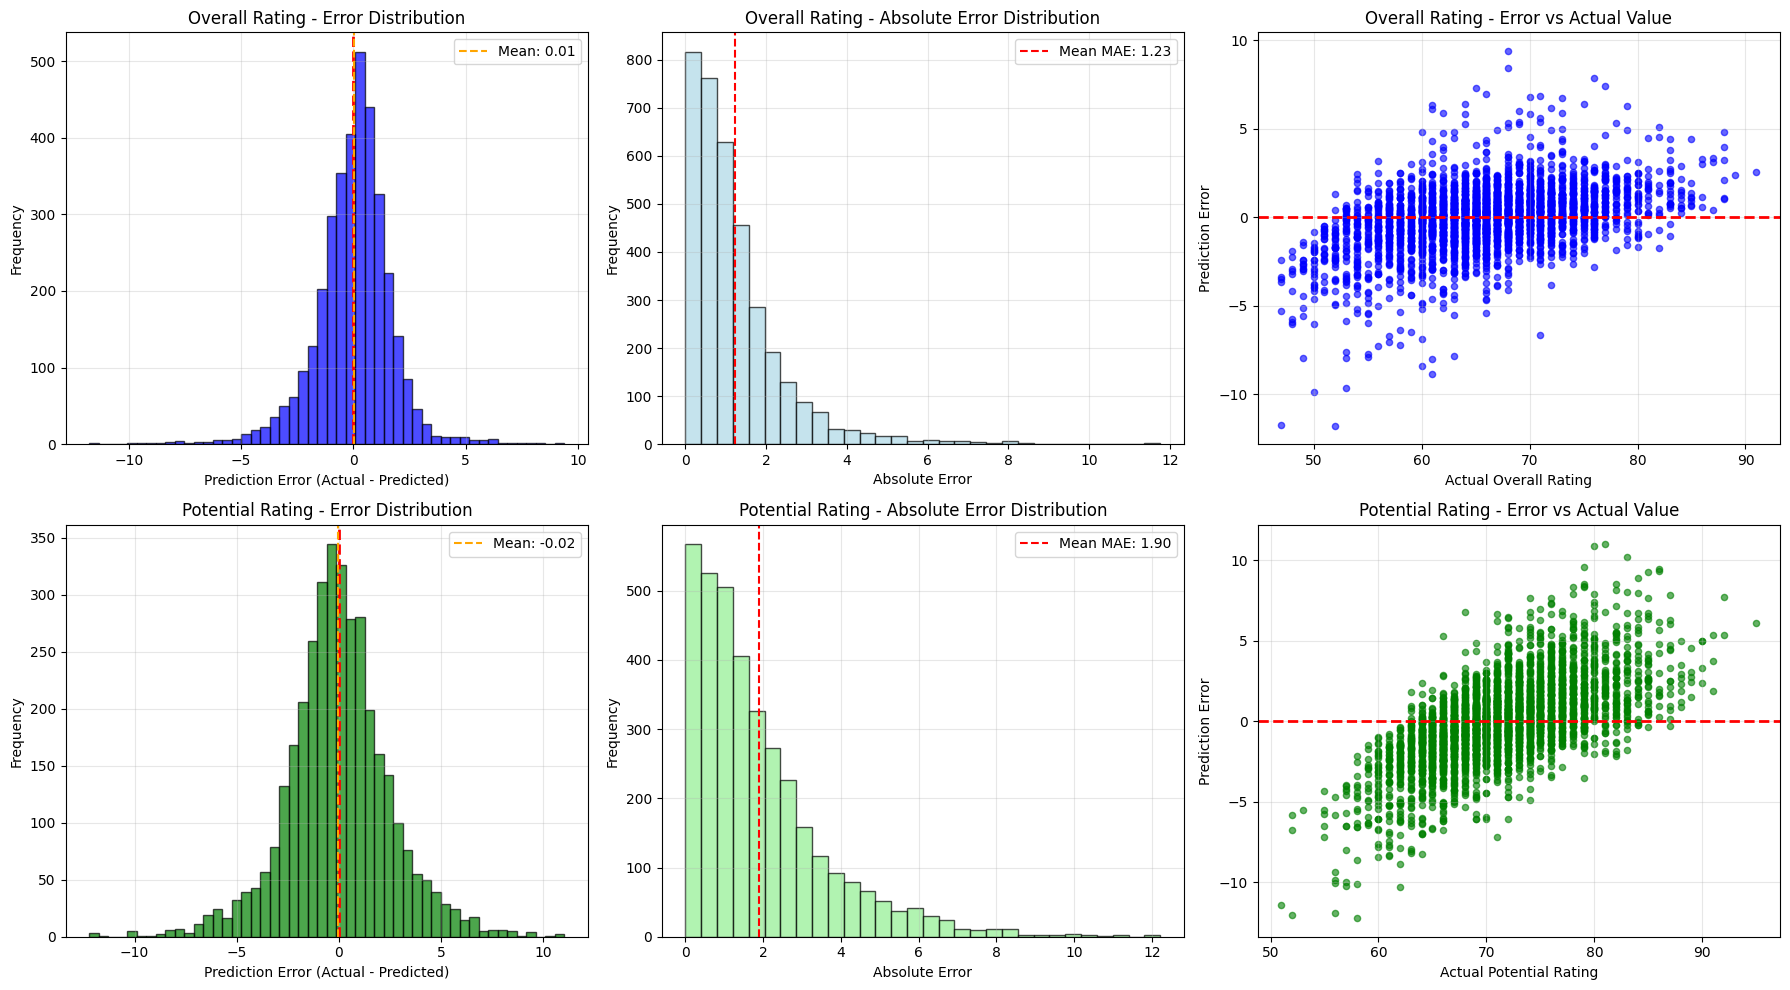

In [23]:
# ================================================================
# 5.3 ERROR DISTRIBUTION VISUALIZATIONS
# ================================================================

print("\n5.3 ERROR DISTRIBUTION VISUALIZATIONS")
print("-"*40)

# Calculate prediction errors
overall_errors = y_overall_test - y_overall_pred_test
potential_errors = y_potential_test - y_potential_pred_test

# Create error distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Overall Rating Error Analysis
axes[0, 0].hist(overall_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].axvline(overall_errors.mean(), color='orange', linestyle='--', 
                   label=f'Mean: {overall_errors.mean():.2f}')
axes[0, 0].set_xlabel('Prediction Error (Actual - Predicted)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Overall Rating - Error Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Overall Rating Absolute Error
abs_overall_errors = np.abs(overall_errors)
axes[0, 1].hist(abs_overall_errors, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 1].axvline(abs_overall_errors.mean(), color='red', linestyle='--', 
                   label=f'Mean MAE: {abs_overall_errors.mean():.2f}')
axes[0, 1].set_xlabel('Absolute Error')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Overall Rating - Absolute Error Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Overall Rating Error vs Actual
axes[0, 2].scatter(y_overall_test, overall_errors, alpha=0.6, color='blue', s=20)
axes[0, 2].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Actual Overall Rating')
axes[0, 2].set_ylabel('Prediction Error')
axes[0, 2].set_title('Overall Rating - Error vs Actual Value')
axes[0, 2].grid(True, alpha=0.3)

# Potential Rating Error Analysis
axes[1, 0].hist(potential_errors, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].axvline(potential_errors.mean(), color='orange', linestyle='--', 
                   label=f'Mean: {potential_errors.mean():.2f}')
axes[1, 0].set_xlabel('Prediction Error (Actual - Predicted)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Potential Rating - Error Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Potential Rating Absolute Error
abs_potential_errors = np.abs(potential_errors)
axes[1, 1].hist(abs_potential_errors, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].axvline(abs_potential_errors.mean(), color='red', linestyle='--', 
                   label=f'Mean MAE: {abs_potential_errors.mean():.2f}')
axes[1, 1].set_xlabel('Absolute Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Potential Rating - Absolute Error Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Potential Rating Error vs Actual
axes[1, 2].scatter(y_potential_test, potential_errors, alpha=0.6, color='green', s=20)
axes[1, 2].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 2].set_xlabel('Actual Potential Rating')
axes[1, 2].set_ylabel('Prediction Error')
axes[1, 2].set_title('Potential Rating - Error vs Actual Value')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


5.4 MODEL PERFORMANCE COMPARISON
----------------------------------------


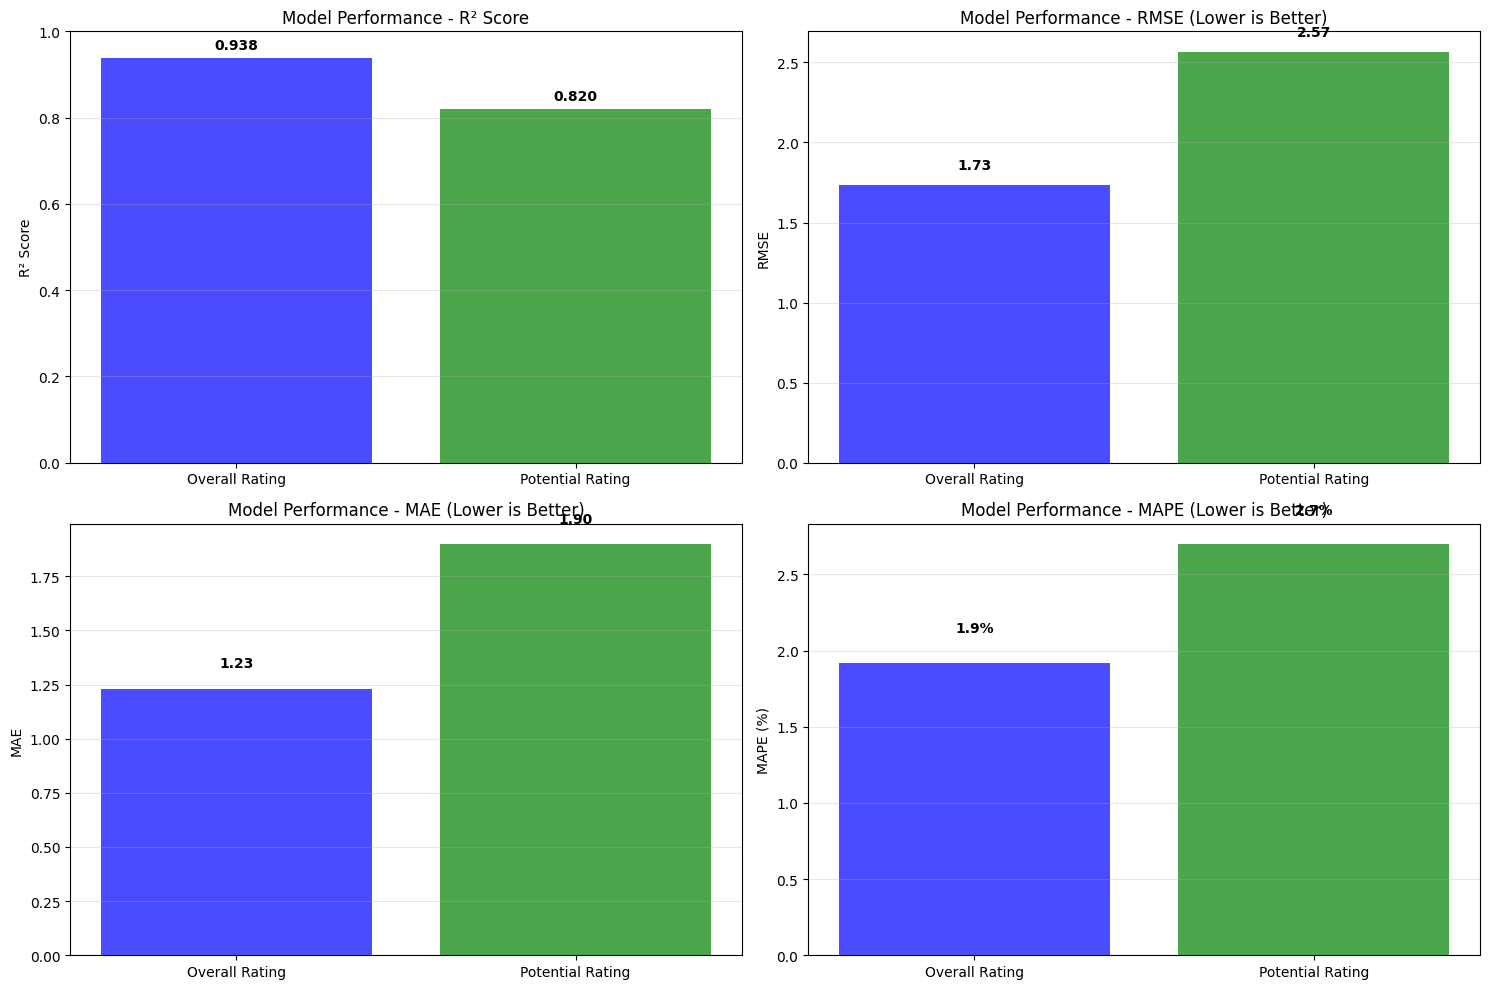

In [24]:
# ================================================================
# 5.4 MODEL PERFORMANCE COMPARISON
# ================================================================

print("\n5.4 MODEL PERFORMANCE COMPARISON")
print("-"*40)

# Create performance comparison charts
metrics_comparison = {
    'R² Score': [overall_test_metrics['R²'], potential_test_metrics['R²']],
    'RMSE': [overall_test_metrics['RMSE'], potential_test_metrics['RMSE']],
    'MAE': [overall_test_metrics['MAE'], potential_test_metrics['MAE']],
    'MAPE (%)': [overall_test_metrics['MAPE'], potential_test_metrics['MAPE']]
}

models = ['Overall Rating', 'Potential Rating']

# Create subplot for metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² Score
axes[0, 0].bar(models, metrics_comparison['R² Score'], color=['blue', 'green'], alpha=0.7)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Model Performance - R² Score')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(metrics_comparison['R² Score']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# RMSE
axes[0, 1].bar(models, metrics_comparison['RMSE'], color=['blue', 'green'], alpha=0.7)
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Model Performance - RMSE (Lower is Better)')
for i, v in enumerate(metrics_comparison['RMSE']):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# MAE
axes[1, 0].bar(models, metrics_comparison['MAE'], color=['blue', 'green'], alpha=0.7)
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Model Performance - MAE (Lower is Better)')
for i, v in enumerate(metrics_comparison['MAE']):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# MAPE
axes[1, 1].bar(models, metrics_comparison['MAPE (%)'], color=['blue', 'green'], alpha=0.7)
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_title('Model Performance - MAPE (Lower is Better)')
for i, v in enumerate(metrics_comparison['MAPE (%)']):
    axes[1, 1].text(i, v + 0.2, f'{v:.1f}%', ha='center', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



5.5 PREDICTION ACCURACY BY RATING RANGES
----------------------------------------


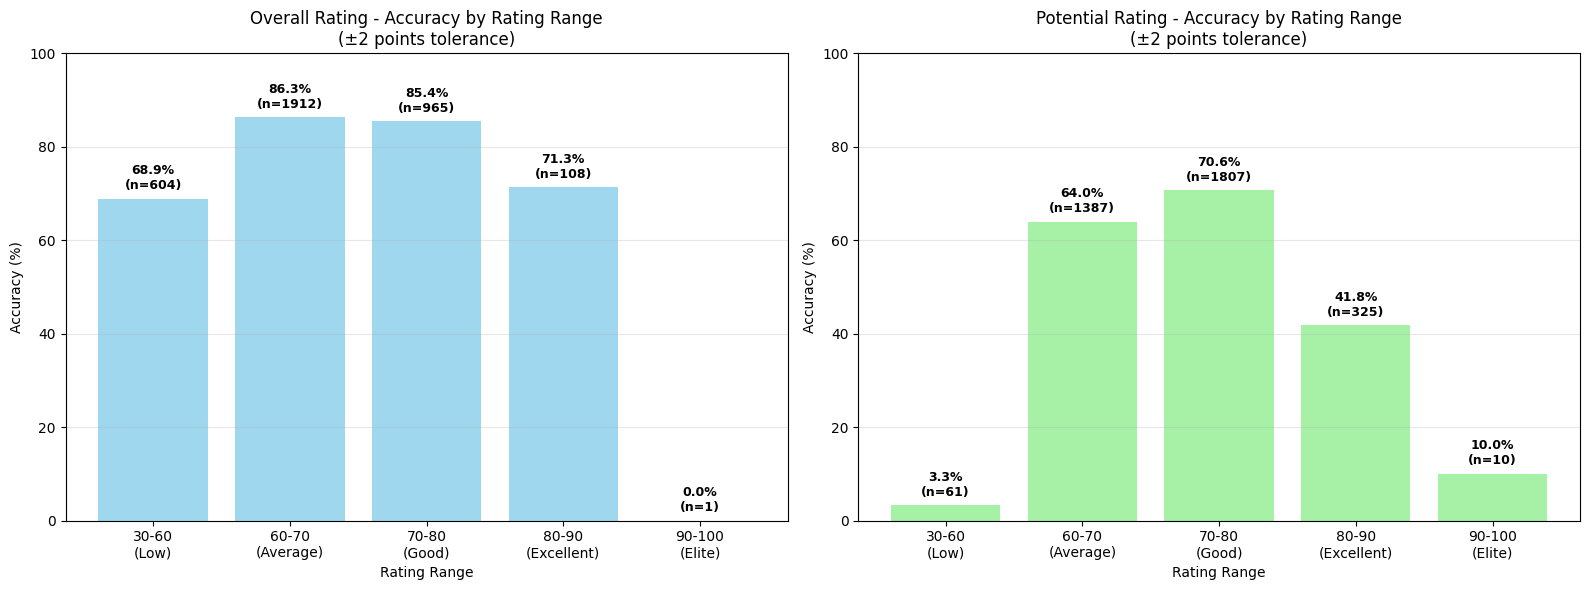

In [25]:
# ================================================================
# 5.5 PREDICTION ACCURACY BY RATING RANGES
# ================================================================

print("\n5.5 PREDICTION ACCURACY BY RATING RANGES")
print("-"*40)

# Define rating ranges
rating_ranges = [(30, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
range_labels = ['30-60\n(Low)', '60-70\n(Average)', '70-80\n(Good)', '80-90\n(Excellent)', '90-100\n(Elite)']

# Calculate accuracy for each rating range
def calculate_accuracy_by_range(y_true, y_pred, ranges, tolerance=2):
    accuracies = []
    sample_counts = []
    
    for min_val, max_val in ranges:
        mask = (y_true >= min_val) & (y_true < max_val)
        if mask.sum() > 0:
            y_true_range = y_true[mask]
            y_pred_range = y_pred[mask]
            
            within_tolerance = np.abs(y_true_range - y_pred_range) <= tolerance
            accuracy = np.mean(within_tolerance) * 100
            accuracies.append(accuracy)
            sample_counts.append(mask.sum())
        else:
            accuracies.append(0)
            sample_counts.append(0)
    
    return accuracies, sample_counts

# Calculate accuracies
overall_accuracies, overall_counts = calculate_accuracy_by_range(y_overall_test, y_overall_pred_test, rating_ranges)
potential_accuracies, potential_counts = calculate_accuracy_by_range(y_potential_test, y_potential_pred_test, rating_ranges)

# Create accuracy by range visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall Rating Accuracy by Range
x_pos = np.arange(len(range_labels))
bars1 = axes[0].bar(x_pos, overall_accuracies, color='skyblue', alpha=0.8)
axes[0].set_xlabel('Rating Range')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Overall Rating - Accuracy by Rating Range\n(±2 points tolerance)')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(range_labels)
axes[0].set_ylim(0, 100)
axes[0].grid(True, alpha=0.3, axis='y')

# Add accuracy values and sample counts on bars
for i, (acc, count) in enumerate(zip(overall_accuracies, overall_counts)):
    if count > 0:
        axes[0].text(i, acc + 2, f'{acc:.1f}%\n(n={count})', ha='center', fontweight='bold', fontsize=9)

# Potential Rating Accuracy by Range
bars2 = axes[1].bar(x_pos, potential_accuracies, color='lightgreen', alpha=0.8)
axes[1].set_xlabel('Rating Range')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Potential Rating - Accuracy by Rating Range\n(±2 points tolerance)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(range_labels)
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3, axis='y')

# Add accuracy values and sample counts on bars
for i, (acc, count) in enumerate(zip(potential_accuracies, potential_counts)):
    if count > 0:
        axes[1].text(i, acc + 2, f'{acc:.1f}%\n(n={count})', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


5.6 PREDICTION EXAMPLES
----------------------------------------


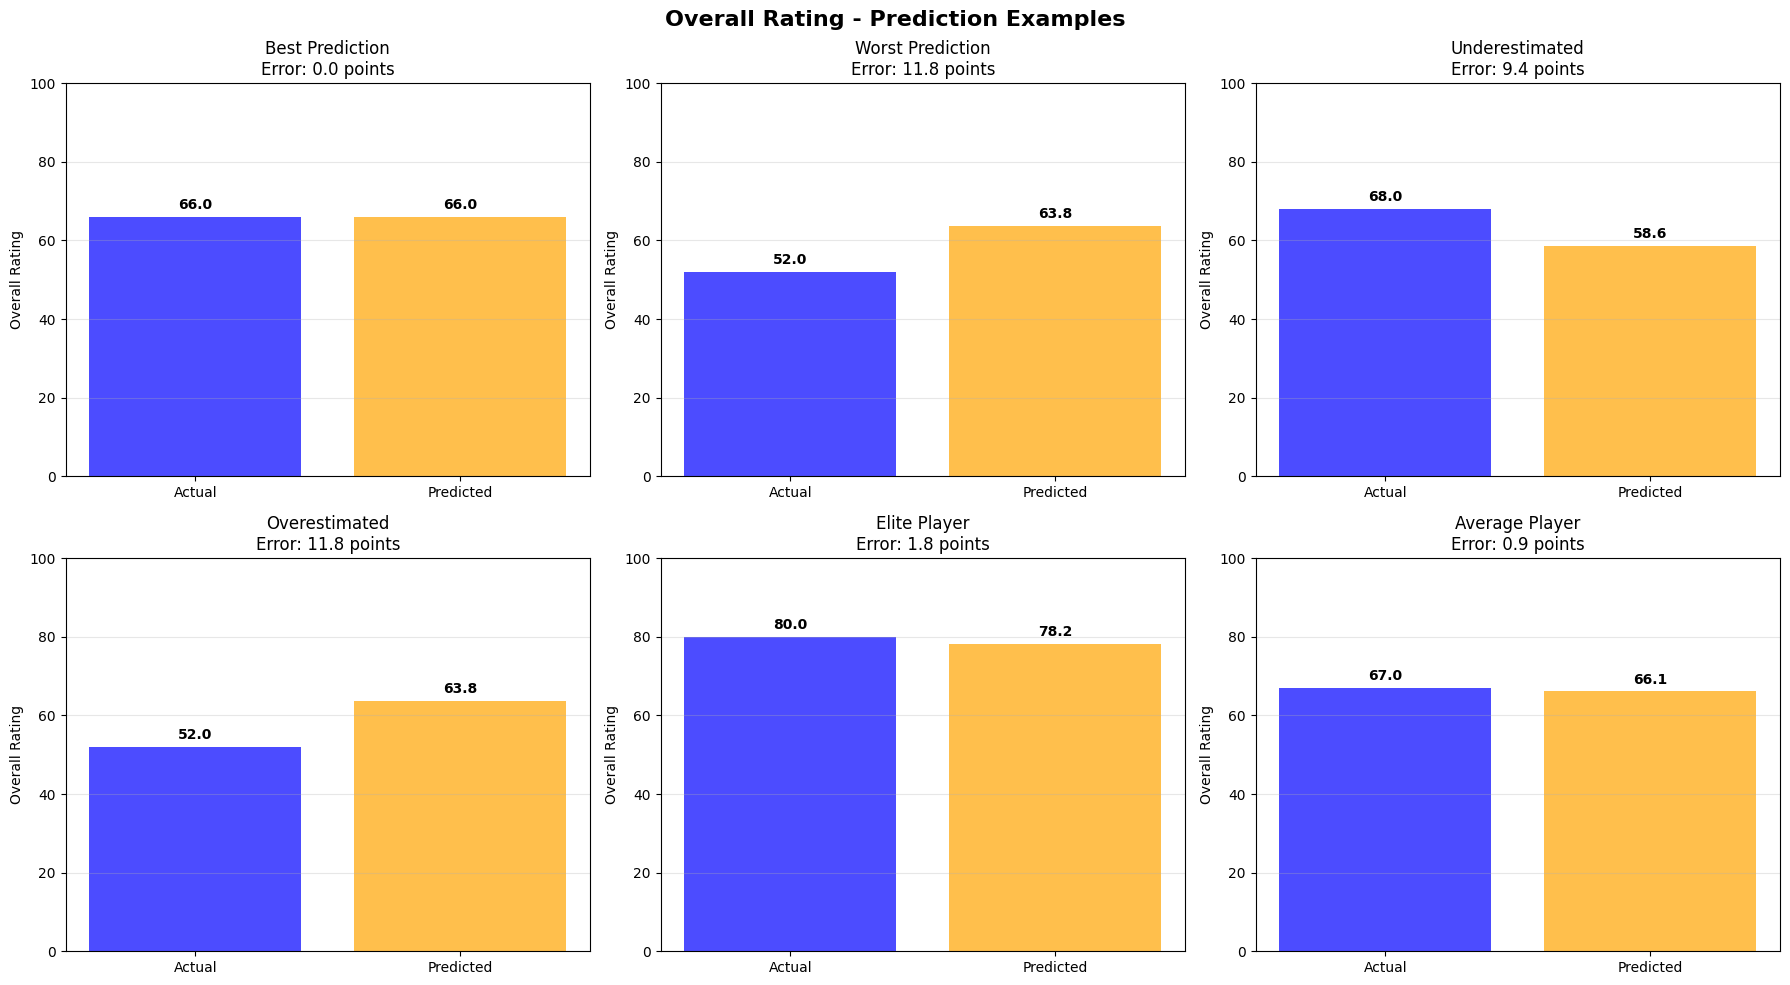

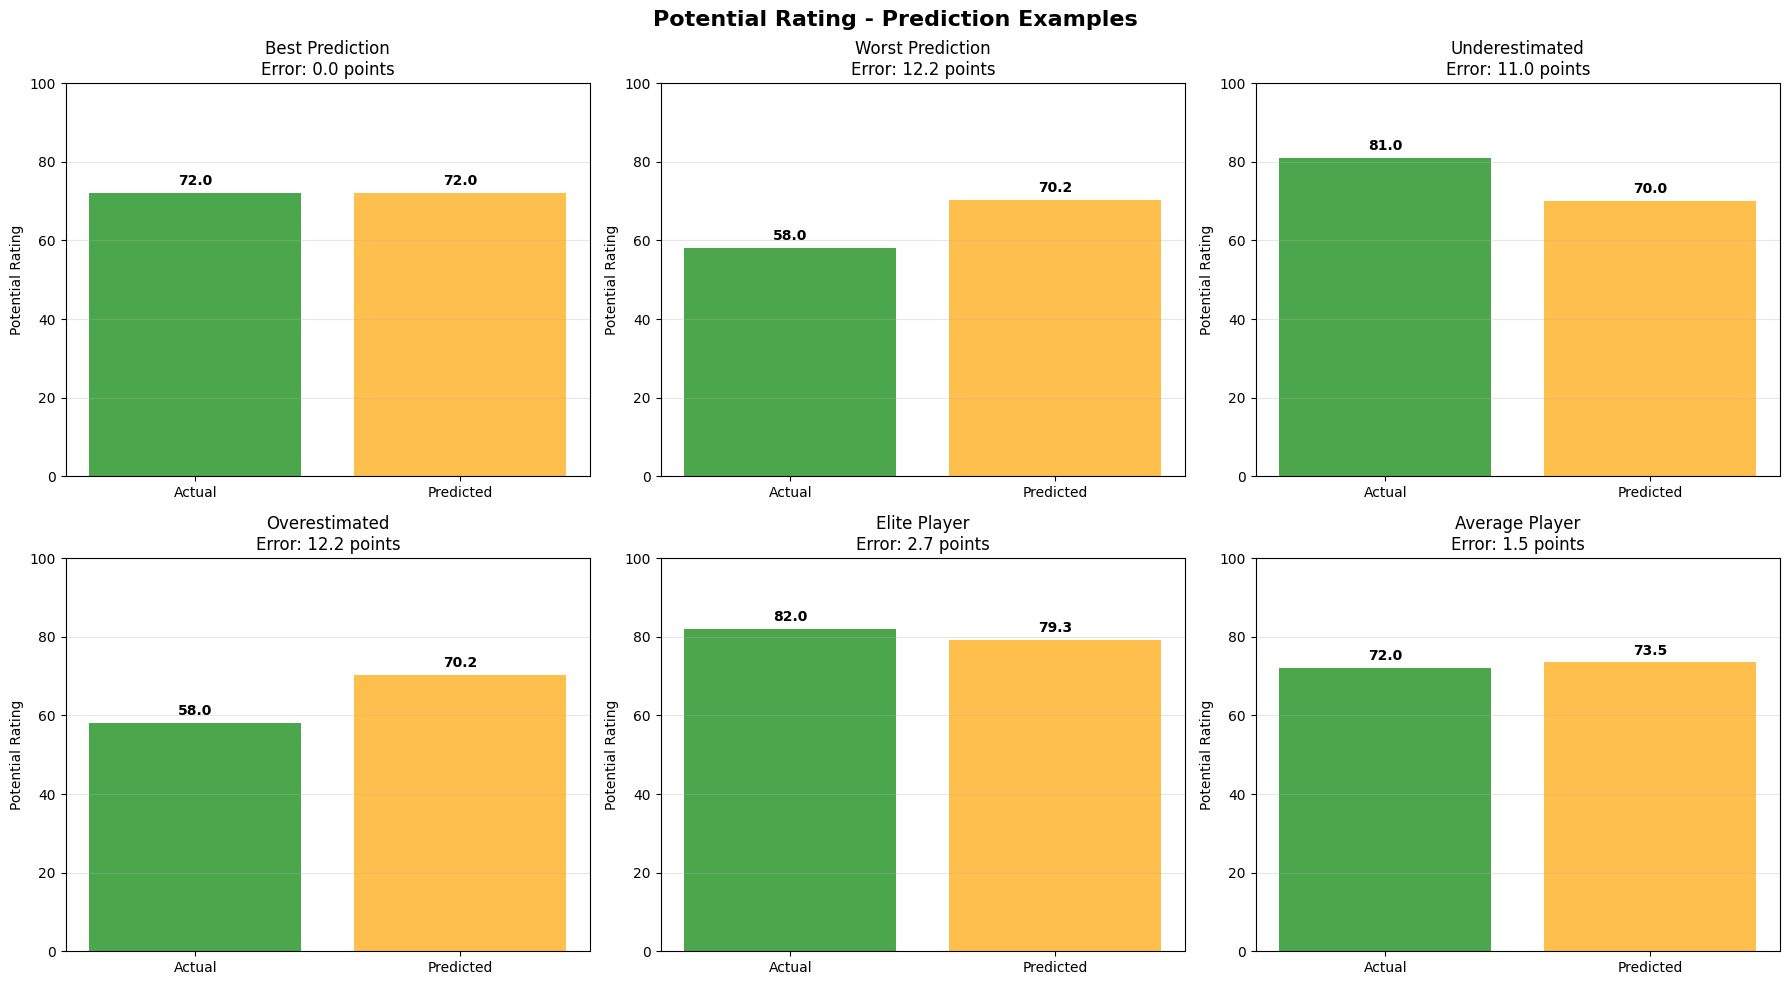

In [26]:
# ================================================================
# 5.6 PREDICTION EXAMPLES
# ================================================================

print("\n5.6 PREDICTION EXAMPLES")
print("-"*40)

# Select interesting prediction examples
def get_prediction_examples(y_true, y_pred, n_examples=6):
    errors = np.abs(y_true - y_pred)
    
    examples = []
    
    # Best prediction
    best_idx = np.argmin(errors)
    examples.append(('Best Prediction', best_idx))
    
    # Worst prediction
    worst_idx = np.argmax(errors)
    examples.append(('Worst Prediction', worst_idx))
    
    # Underestimation
    underest_errors = y_pred - y_true
    underest_idx = np.argmin(underest_errors)
    examples.append(('Underestimated', underest_idx))
    
    # Overestimation
    overest_idx = np.argmax(underest_errors)
    examples.append(('Overestimated', overest_idx))
    
    # High-rated player
    high_rated_mask = y_true >= 80
    if high_rated_mask.sum() > 0:
        high_rated_indices = np.where(high_rated_mask)[0]
        high_rated_idx = high_rated_indices[len(high_rated_indices)//2]
        examples.append(('Elite Player', high_rated_idx))
    
    # Average player
    avg_mask = (y_true >= 65) & (y_true <= 75)
    if avg_mask.sum() > 0:
        avg_indices = np.where(avg_mask)[0]
        avg_idx = avg_indices[len(avg_indices)//2]
        examples.append(('Average Player', avg_idx))
    
    return examples[:n_examples]

# Get examples for both models
overall_examples = get_prediction_examples(y_overall_test, y_overall_pred_test)
potential_examples = get_prediction_examples(y_potential_test, y_potential_pred_test)

# Visualize prediction examples
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot Overall Rating examples
for i, (label, idx) in enumerate(overall_examples):
    if i >= 6:
        break
        
    actual = y_overall_test.iloc[idx]
    predicted = y_overall_pred_test[idx]
    error = abs(actual - predicted)
    
    categories = ['Actual', 'Predicted']
    values = [actual, predicted]
    colors = ['blue', 'orange']
    
    bars = axes[i].bar(categories, values, color=colors, alpha=0.7)
    axes[i].set_ylim(0, 100)
    axes[i].set_ylabel('Overall Rating')
    axes[i].set_title(f'{label}\nError: {error:.1f} points')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for j, v in enumerate(values):
        axes[i].text(j, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

# Remove empty subplots
for i in range(len(overall_examples), 6):
    if i < len(axes):
        fig.delaxes(axes[i])

plt.suptitle('Overall Rating - Prediction Examples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot Potential Rating examples
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (label, idx) in enumerate(potential_examples):
    if i >= 6:
        break
        
    actual = y_potential_test.iloc[idx]
    predicted = y_potential_pred_test[idx]
    error = abs(actual - predicted)
    
    categories = ['Actual', 'Predicted']
    values = [actual, predicted]
    colors = ['green', 'orange']
    
    bars = axes[i].bar(categories, values, color=colors, alpha=0.7)
    axes[i].set_ylim(0, 100)
    axes[i].set_ylabel('Potential Rating')
    axes[i].set_title(f'{label}\nError: {error:.1f} points')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for j, v in enumerate(values):
        axes[i].text(j, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

# Remove empty subplots
for i in range(len(potential_examples), 6):
    if i < len(axes):
        fig.delaxes(axes[i])

plt.suptitle('Potential Rating - Prediction Examples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
# ================================================================
# 5.7 FINAL SUMMARY
# ================================================================

print("\n5.7 FINAL SUMMARY")
print("-"*40)

print("📊 MODEL PERFORMANCE SUMMARY:")
print(f"{'Metric':<15} {'Overall Model':<15} {'Potential Model':<15}")
print("-" * 45)
print(f"{'R² Score':<15} {overall_test_metrics['R²']:<15.3f} {potential_test_metrics['R²']:<15.3f}")
print(f"{'RMSE':<15} {overall_test_metrics['RMSE']:<15.2f} {potential_test_metrics['RMSE']:<15.2f}")
print(f"{'MAE':<15} {overall_test_metrics['MAE']:<15.2f} {potential_test_metrics['MAE']:<15.2f}")
print(f"{'MAPE (%)':<15} {overall_test_metrics['MAPE']:<15.1f} {potential_test_metrics['MAPE']:<15.1f}")

overall_acc_2 = accuracy_within_tolerance(y_overall_test, y_overall_pred_test, 2)
potential_acc_2 = accuracy_within_tolerance(y_potential_test, y_potential_pred_test, 2)
print(f"{'Accuracy ±2pts':<15} {overall_acc_2:<15.1f}% {potential_acc_2:<15.1f}%")

print(f"\n🎯 MODEL RELIABILITY:")
if overall_test_metrics['R²'] > 0.8 and potential_test_metrics['R²'] > 0.8:
    print("   ✅ Excellent - Both models ready for production")
elif overall_test_metrics['R²'] > 0.7 and potential_test_metrics['R²'] > 0.7:
    print("   ⚠️ Good - Models suitable for most applications")
elif overall_test_metrics['R²'] > 0.6 and potential_test_metrics['R²'] > 0.6:
    print("   ⚠️ Fair - Models may need improvement")
else:
    print("   ❌ Poor - Models need significant improvement")

print(f"\n🔧 TOP FEATURES:")
print("Overall Rating Model:")
for i, (_, row) in enumerate(feature_importance_overall.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.3f}")

print("Potential Rating Model:")
for i, (_, row) in enumerate(feature_importance_potential.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.3f}")

print(f"\n✅ PIPELINE COMPLETED SUCCESSFULLY!")
print("   - Models trained and evaluated")
print("   - Comprehensive visualizations created")
print("   - Models saved for future use")
print("   - Ready for deployment or further analysis")


5.7 FINAL SUMMARY
----------------------------------------
📊 MODEL PERFORMANCE SUMMARY:
Metric          Overall Model   Potential Model
---------------------------------------------
R² Score        0.938           0.820          
RMSE            1.73            2.57           
MAE             1.23            1.90           
MAPE (%)        1.9             2.7            
Accuracy ±2pts  82.7           % 64.1           %

🎯 MODEL RELIABILITY:
   ✅ Excellent - Both models ready for production

🔧 TOP FEATURES:
Overall Rating Model:
   1. reactions: 0.240
   2. composure: 0.135
   3. ball_control: 0.112
   4. defending_composite: 0.086
   5. dribbling: 0.060
Potential Rating Model:
   1. age: 0.209
   2. reactions: 0.128
   3. ball_control: 0.111
   4. defending_composite: 0.084
   5. dribbling: 0.081

✅ PIPELINE COMPLETED SUCCESSFULLY!
   - Models trained and evaluated
   - Comprehensive visualizations created
   - Models saved for future use
   - Ready for deployment or further analysis